<a href="https://colab.research.google.com/github/Raybarreto/Hackathon/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracão

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import time

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_recall_curve, precision_score, recall_score, f1_score, confusion_matrix, classification_report)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Telecom_churn.csv'
df = pd.read_csv(file_path, encoding='latin-1', sep=',', low_memory=False)
print("Dados extraídos com sucesso")

Dados extraídos com sucesso


# 1. Carga de Dados

In [ ]:
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,Y,U,Y,773.0,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,N,U,U,Y,Y,Y,Y,835.0,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,U,Y,Y,U,U,U,N,433.0,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,U,U,N,75.0,1099999


In [ ]:
df.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000,...,99999.000000,98268.000000,98268.000000,69810.000000,76981.000000,74564.000000,50634.000000,98268.000000,99999.000000,1.000000e+05
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,...,1.545825,0.188820,0.082580,6.177238,2.530326,5.783112,1.567563,0.057974,391.932309,1.050000e+06
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,276.087509,...,0.898395,0.391368,0.275248,4.735267,1.452819,2.182132,0.625456,0.233696,256.482193,2.886766e+04
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1.000001e+06
25%,33.260000,150.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-87.000000,...,1.000000,0.000000,0.000000,2.000000,1.000000,4.000000,1.000000,0.000000,212.000000,1.025001e+06
50%,48.195000,355.500000,44.990000,0.247500,2.750000,1.000000,0.682500,0.000000,0.000000,-6.250000,...,1.000000,0.000000,0.000000,5.000000,2.000000,6.000000,1.000000,0.000000,342.000000,1.050000e+06
75%,70.750000,703.000000,59.990000,0.990000,42.000000,14.437500,14.025000,0.000000,0.235000,63.000000,...,2.000000,0.000000,0.000000,9.000000,3.000000,7.000000,2.000000,0.000000,530.000000,1.075000e+06
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,31219.250000,...,16.000000,1.000000,1.000000,15.000000,6.000000,9.000000,3.000000,1.000000,1823.000000,1.100000e+06


In [ ]:
print("\n--- Informações do Dataset (dtypes e nulos) ---")
df.info()


--- Informações do Dataset (dtypes e nulos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     1

In [ ]:
print("\n--- Análise da Variável churn ---")
print("\nContagem de Churn (0: Não Evadiu, 1: Evadiu):")
churn_counts = df['churn'].value_counts()
print(churn_counts.to_markdown(numalign="left", stralign="left"))
print("\n")

print("\nPercentual de Churn:")
churn_percentage = df['churn'].value_counts(normalize=True) * 100
print(churn_percentage.to_markdown(floatfmt=".2f", numalign="left", stralign="left"))
print("\n")


--- Análise da Variável churn ---

Contagem de Churn (0: Não Evadiu, 1: Evadiu):
| churn   | count   |
|:--------|:--------|
| 0       | 50438   |
| 1       | 49562   |



Percentual de Churn:
| churn   | proportion   |
|:--------|:-------------|
| 0       | 50.44        |
| 1       | 49.56        |




# 2. Limpeza e Pré-processamento (Dados Ausentes)

In [ ]:
print("--- Verificando Inconsistências nos Dados ---")
print("\nContagem de valores ausentes por coluna antes do tratamento:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

--- Verificando Inconsistências nos Dados ---

Contagem de valores ausentes por coluna antes do tratamento:
|                  | 0     |
|:-----------------|:------|
| rev_Mean         | 357   |
| mou_Mean         | 357   |
| totmrc_Mean      | 357   |
| da_Mean          | 357   |
| ovrmou_Mean      | 357   |
| ovrrev_Mean      | 357   |
| vceovr_Mean      | 357   |
| datovr_Mean      | 357   |
| roam_Mean        | 357   |
| change_mou       | 891   |
| change_rev       | 891   |
| drop_vce_Mean    | 0     |
| drop_dat_Mean    | 0     |
| blck_vce_Mean    | 0     |
| blck_dat_Mean    | 0     |
| unan_vce_Mean    | 0     |
| unan_dat_Mean    | 0     |
| plcd_vce_Mean    | 0     |
| plcd_dat_Mean    | 0     |
| recv_vce_Mean    | 0     |
| recv_sms_Mean    | 0     |
| comp_vce_Mean    | 0     |
| comp_dat_Mean    | 0     |
| custcare_Mean    | 0     |
| ccrndmou_Mean    | 0     |
| cc_mou_Mean      | 0     |
| inonemin_Mean    | 0     |
| threeway_Mean    | 0     |
| mou_cvce_Mean    | 0

In [ ]:
cols_low_missing = ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean',
                    'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'eqpdays']

for col in cols_low_missing:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

df['dualband'] = df['dualband'].fillna(df['dualband'].mode()[0])
df['refurb_new'] = df['refurb_new'].fillna(df['refurb_new'].mode()[0])
df['phones'] = df['phones'].fillna(df['phones'].median())
df['models'] = df['models'].fillna(df['models'].median())

In [ ]:
cols_avg6 = ['avg6mou', 'avg6qty', 'avg6rev']
for col in cols_avg6:
    df[col] = df[col].fillna(0)

In [ ]:
cols_categ_missing = ['prizm_social_one', 'area', 'hnd_webcap', 'ownrent', 'dwlltype',
                      'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'creditcd',
                      'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17']

for col in cols_categ_missing:
    df[col] = df[col].fillna('Missing')

In [ ]:
cols_num_missing = ['truck', 'rv', 'lor', 'adults', 'income', 'numbcars', 'forgntvl']

for col in cols_num_missing:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

In [ ]:
print("--- Verificando Inconsistências nos Dados ---")
print("\nContagem de valores ausentes por coluna após tratamento:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

--- Verificando Inconsistências nos Dados ---

Contagem de valores ausentes por coluna após tratamento:
|                  | 0   |
|:-----------------|:----|
| rev_Mean         | 0   |
| mou_Mean         | 0   |
| totmrc_Mean      | 0   |
| da_Mean          | 0   |
| ovrmou_Mean      | 0   |
| ovrrev_Mean      | 0   |
| vceovr_Mean      | 0   |
| datovr_Mean      | 0   |
| roam_Mean        | 0   |
| change_mou       | 0   |
| change_rev       | 0   |
| drop_vce_Mean    | 0   |
| drop_dat_Mean    | 0   |
| blck_vce_Mean    | 0   |
| blck_dat_Mean    | 0   |
| unan_vce_Mean    | 0   |
| unan_dat_Mean    | 0   |
| plcd_vce_Mean    | 0   |
| plcd_dat_Mean    | 0   |
| recv_vce_Mean    | 0   |
| recv_sms_Mean    | 0   |
| comp_vce_Mean    | 0   |
| comp_dat_Mean    | 0   |
| custcare_Mean    | 0   |
| ccrndmou_Mean    | 0   |
| cc_mou_Mean      | 0   |
| inonemin_Mean    | 0   |
| threeway_Mean    | 0   |
| mou_cvce_Mean    | 0   |
| mou_cdat_Mean    | 0   |
| mou_rvce_Mean    | 0   |
| owy

# 3. Engenharia de Features

In [ ]:
# Novas váriaveis. Adicionando +1 no denominador para evitar divisão por zero
df['rev_per_minute'] = df['rev_Mean'] / (df['mou_Mean'] + 1)
df['calls_per_month'] = df['totcalls'] / (df['months'] + 1)
df['eqp_age_index'] = df['eqpdays'] / (df['months'] + 1)

In [ ]:
# 5 originais + 3 criadas
features_expandidas = [
    'months', 'rev_Mean', 'mou_Mean', 'totcalls', 'eqpdays',
    'rev_per_minute', 'calls_per_month', 'eqp_age_index'
]

X = df[features_expandidas]
y = df['churn']

#4. Treinameto dos modelos: Regressão Logística, Random Forest, XGBoost, SVM e Rede Neural (MLP)

In [ ]:
# Preparação dos Dados
X = df[features_expandidas]
y = df['churn']

# Treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonamento (Fundamental para SVM e Redes Neurais)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Definição dos Modelos
modelos = {
    "Regressão Logística": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "Rede Neural (MLP)": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

In [ ]:
# Treinamento e Avaliação
resultados = {}

print("Iniciando treinamento...\n")
for nome, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)
    predicoes = modelo.predict(X_test_scaled)
    acc = accuracy_score(y_test, predicoes)
    resultados[nome] = acc
    print(f"{nome}: Acurácia de {acc:.4f}")

Iniciando treinamento...

Regressão Logística: Acurácia de 0.5635
Random Forest: Acurácia de 0.5808


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:21:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: Acurácia de 0.5985
SVM: Acurácia de 0.5888
Rede Neural (MLP): Acurácia de 0.5971


**Avaliação de métricas**

In [ ]:
# 1. Lista para armazenar os resultados
lista_metricas = []

print("Calculando métricas para cada modelo...")

for nome, modelo in modelos.items():
    # Previsões
    y_pred = modelo.predict(X_test_scaled)

    # Cálculo das métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Guardar no dicionário
    lista_metricas.append({
        'Modelo': nome,
        'Acurácia': acc,
        'Precisão': prec,
        'Recall': rec,
        'F1-Score': f1
    })

# 2. Criar DataFrame de comparação
df_comparacao = pd.DataFrame(lista_metricas).set_index('Modelo').sort_values(by='F1-Score', ascending=False)

print("\nTabela Comparativa:")
print(df_comparacao)

Calculando métricas para cada modelo...

Tabela Comparativa:
                     Acurácia  Precisão    Recall  F1-Score
Modelo                                                     
SVM                   0.58885  0.574673  0.677122  0.621705
Rede Neural (MLP)     0.59715  0.589147  0.636437  0.611879
XGBoost               0.59850  0.594109  0.616495  0.605095
Random Forest         0.58085  0.582438  0.564986  0.573580
Regressão Logística   0.56345  0.574802  0.480509  0.523443


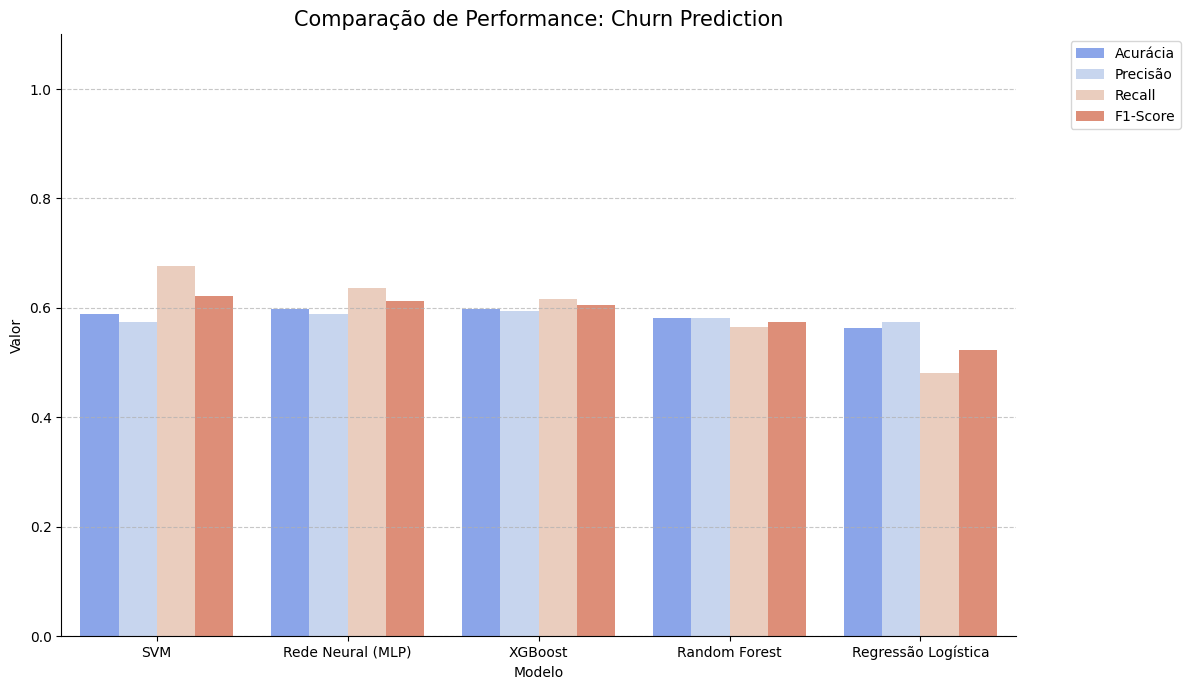

In [ ]:
plt.figure(figsize=(12, 7))
df_plot = df_comparacao.reset_index().melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

sns.barplot(data=df_plot, x='Modelo', y='Valor', hue='Métrica', palette='tab20c')
plt.title('Comparação de Performance: Churn Prediction', fontsize=15)
plt.ylim(0, 1.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
sns.despine()
plt.show()

# 5. Treinamento e Avaliação do Modelo - XGBoost

In [ ]:
# Preparação e Escalonamento
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [ ]:
# Treinamento do XGBoost
modelo_xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
modelo_xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Limiar de Equilíbrio (Threshold)
y_probs = modelo_xgb.predict_proba(X_test_scaled)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Cálculo do F1 para cada threshold
f1_scores = (2 * precisions * recalls) / (precisions + recalls + 1e-10)
melhor_idx = np.argmax(f1_scores)
melhor_threshold = thresholds[melhor_idx]

# Avaliação Final com o Equilíbrio
y_pred_equilibrado = (y_probs >= melhor_threshold).astype(int)

In [ ]:
print(f"--- Resultado com Engenharia de Variáveis ---")
print(f"Melhor Threshold encontrado: {melhor_threshold:.2f}")
print("\nMétricas de Equilíbrio:")
print(classification_report(y_test, y_pred_equilibrado))

--- Resultado com Engenharia de Variáveis ---
Melhor Threshold encontrado: 0.31

Métricas de Equilíbrio:
              precision    recall  f1-score   support

           0       0.75      0.16      0.26     10021
           1       0.53      0.95      0.68      9979

    accuracy                           0.55     20000
   macro avg       0.64      0.55      0.47     20000
weighted avg       0.64      0.55      0.47     20000



# 6. Métricas

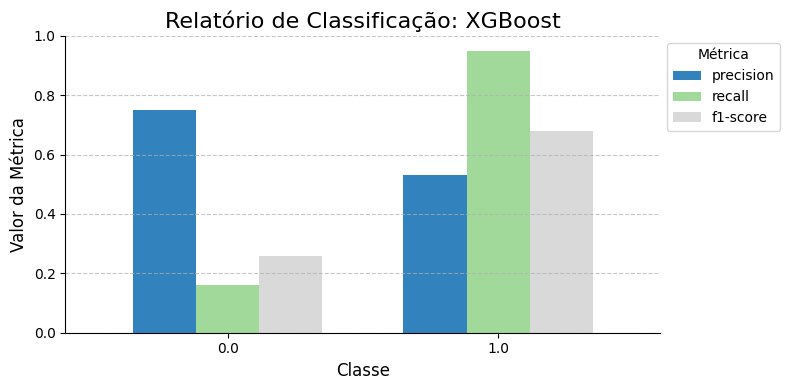

In [ ]:
# Dados do relatório de classificação do XGBoost
rf_report = {
    "precision": {"0.0": 0.75, "1.0": 0.53},
    "recall": {"0.0": 0.16, "1.0": 0.95},
    "f1-score": {"0.0": 0.26, "1.0": 0.68},
    "support": {"0.0": 10021, "1.0": 9979}
}

df_rf_report = pd.DataFrame(rf_report).drop(columns=['support'])

fig, ax = plt.subplots(figsize=(8, 4))
df_rf_report.plot(kind='bar', ax=ax, width=0.7, colormap='tab20c')
ax.set_title('Relatório de Classificação: XGBoost', fontsize=16)
ax.set_ylabel('Valor da Métrica', fontsize=12)
ax.set_xlabel('Classe', fontsize=12)
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Métrica', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
sns.despine()
plt.show()

In [ ]:
# Calculando métricas com o threshold equilibrado
y_pred_final = (y_probs >= melhor_threshold).astype(int)

metricas_novas = {
    'Acurácia': accuracy_score(y_test, y_pred_final),
    'Precisão': precision_score(y_test, y_pred_final),
    'Recall': recall_score(y_test, y_pred_final),
    'F1-Score': f1_score(y_test, y_pred_final)
}

print("--- MÉTRICAS (XGBoost Equilibrado + Novas Features) ---")
for m, v in metricas_novas.items():
    print(f"{m}: {v:.4f}")

# Comparação com o resultado anterior (estimativa de melhora)
print(f"\nMelhoria no F1-Score: {((metricas_novas['F1-Score'] / 0.6099) - 1)*100:.2f}%")

--- MÉTRICAS (XGBoost Equilibrado + Novas Features) ---
Acurácia: 0.5517
Precisão: 0.5284
Recall: 0.9456
F1-Score: 0.6779

Melhoria no F1-Score: 11.16%


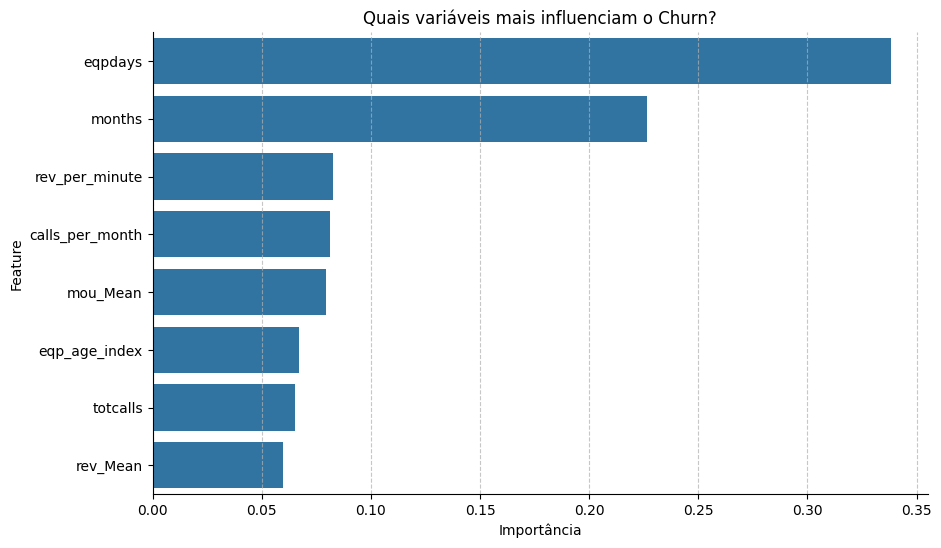

In [ ]:
importancias = modelo_xgb.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': features_expandidas, 'Importância': importancias})
feature_imp_df = feature_imp_df.sort_values(by='Importância', ascending=False)

# Plotar
plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Feature', data=feature_imp_df)
plt.title('Quais variáveis mais influenciam o Churn?')
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.show()


Matriz de Confusão:
[[1599 8422]
 [ 543 9436]]


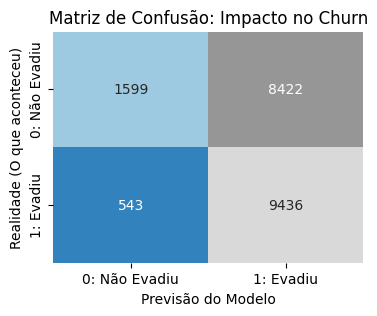

In [ ]:
cm = confusion_matrix(y_test, y_pred_final)

print("\nMatriz de Confusão:")
print(cm)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='tab20c', cbar=False,
            xticklabels=['0: Não Evadiu', '1: Evadiu'],
            yticklabels=['0: Não Evadiu', '1: Evadiu'])
plt.xlabel('Previsão do Modelo')
plt.ylabel('Realidade (O que aconteceu)')
plt.title('Matriz de Confusão: Impacto no Churn')
plt.show()

#7. Serialização do modelo

In [ ]:
# Salvando
joblib.dump(modelo_xgb, 'modelo_churn_equilibrado.joblib')
joblib.dump(scaler, 'scaler_churn_equilibrado.joblib')

['scaler_churn_equilibrado.joblib']

In [ ]:
# Salvamos o threshold em um arquivo separado
joblib.dump({'threshold_equilibrio': melhor_threshold}, 'metadata_churn.joblib')

print(f"Pipeline concluído. Threshold ótimo: {melhor_threshold:.2f}")

Pipeline concluído. Threshold ótimo: 0.31
